# World University Raking Analysis 

#### 1. Import libraries and load data


#### 2. Data Cleaning

#### 3. Exploring Relationships and Analyzing Data 

#### 4. Export file



### 1.Import libraries and load data

In [2]:
#Import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib
import os

In [3]:
# Defining path and importing data 
path = r'C:\Users\ale_o\OneDrive\Escritorio\Data Analytics\7. Advanced Analytics and Dashboard Design'

In [4]:
df = pd.read_csv(os.path.join(path,'Data','Original Data', 'cwurData.csv'))
df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


### 2. Data Cleaning

In [5]:
# Analyzing size of the dataframe and general info 
df.shape

(2200, 14)

In [6]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [8]:

df['institution'].value_counts()

Harvard University                          4
Karolinska Institute                        4
University of Maryland, College Park        4
University of British Columbia              4
Brown University                            4
                                           ..
I-Shou University                           1
University of Maine (Le Mans)               1
National Dong Hwa University                1
National Taipei University of Technology    1
Southwest Jiaotong University               1
Name: institution, Length: 1024, dtype: int64

In [9]:
# Identifying missing values
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [10]:
# Find Duplicates
df_duplicates = df[df.duplicated()]
df_duplicates.shape

(0, 14)

In [11]:
# Check mixed data values 
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

### 3. Exploring Relationships and analyzind data 

#### 3.1 Correlation

In [12]:
# Create a correlation matrix 
df.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.942998,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.173043,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.521615,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.423619,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.549345,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.917878,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.916040,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.852638,0.598728,-0.522438,0.328771
broad_impact,0.942998,0.173043,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861,-0.531590,-0.000124
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.562861,1.000000,-0.474810,0.368570


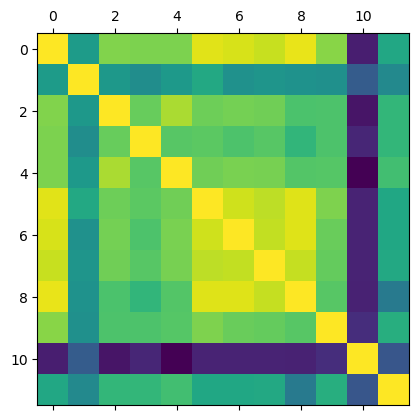

In [13]:
corr_hm = plt.matshow(df.corr())


Text(0.5, 1.0, 'Correlation Matrix')

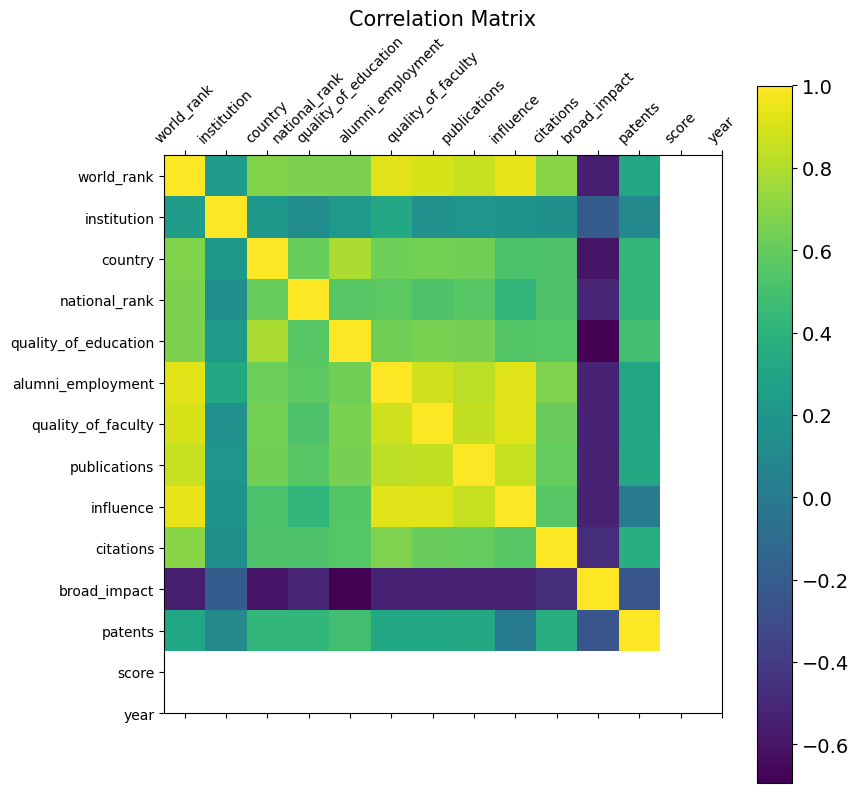

In [18]:
# Create a correlation heatmap
f = plt.figure(figsize=(9,9))
plt.matshow(df.corr(), fignum = f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize = 10, rotation =45)
plt.yticks(range(df.shape[1]), df.columns, fontsize = 10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize =14)
plt.title('Correlation Matrix', fontsize = 15)

Conclusion: There is a big correlation between many of the variables, such as the national rank and the world rank, influence and world rank, influece and quality of faculty and among others. 
And the correlation is low for the broad impact and any other of the variables. 

In [60]:
# Save figure 
f.figure.savefig(os.path.join('Visualizations', 'corr_heatmap.png'))

In [61]:
df_sub = df[['institution', 'score', 'quality_of_education', 'national_rank', 'alumni_employment', 'quality_of_faculty']]
df_sub

,institution,score,quality_of_education,national_rank,alumni_employment,quality_of_faculty
0,Harvard University,100.00,7,1,9,1
1,Massachusetts Institute of Technology,91.67,9,2,17,3
2,Stanford University,89.50,17,3,11,5
3,University of Cambridge,86.17,10,1,24,4
4,California Institute of Technology,85.21,2,4,29,7
...,...,...,...,...,...,...
2195,University of the Algarve,44.03,367,7,567,218
2196,Alexandria University,44.03,236,4,566,218
2197,Federal University of Ceará,44.03,367,18,549,218
2198,University of A Coruña,44.02,367,40,567,218


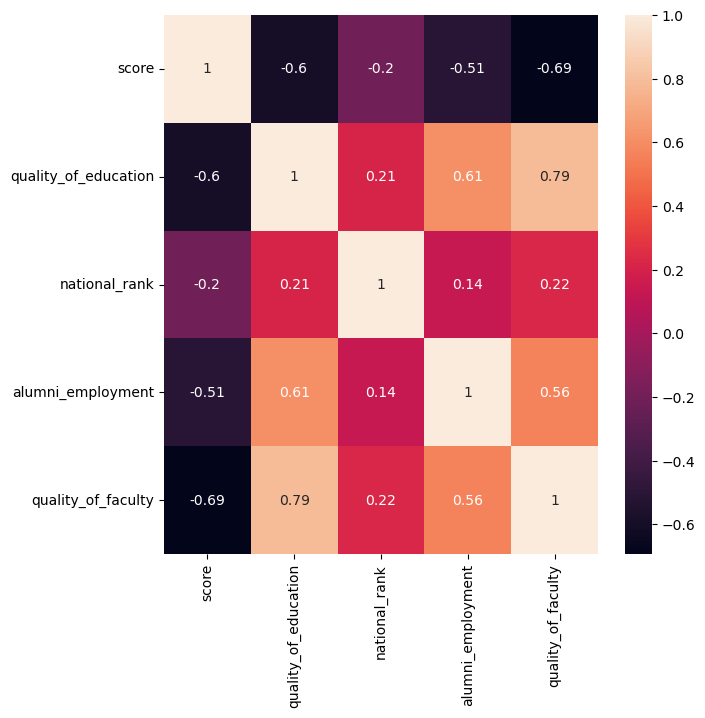

In [59]:
hm_score = plt.subplots(figsize=(7,7))
corr = sns.heatmap(df_sub.corr(), annot = True)

#### 3.2 Scatterplot

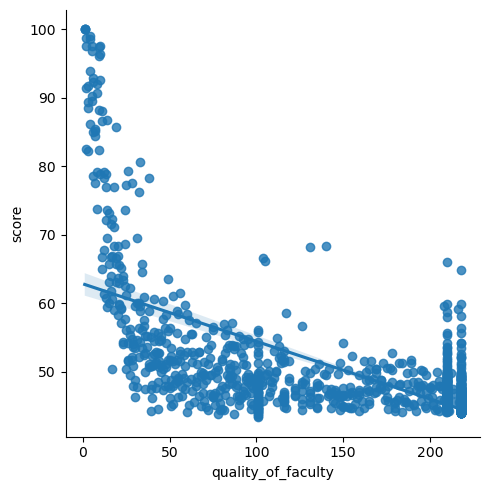

In [66]:
# Create a scatterplot

sns.lmplot( x = 'quality_of_faculty', y = 'score', data = df )

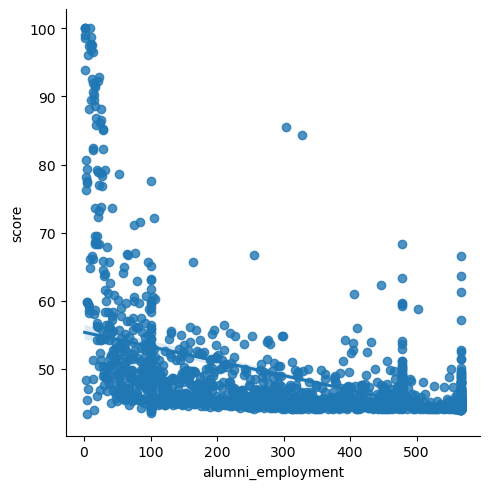

In [67]:
sns.lmplot( x = 'alumni_employment', y = 'score', data = df )

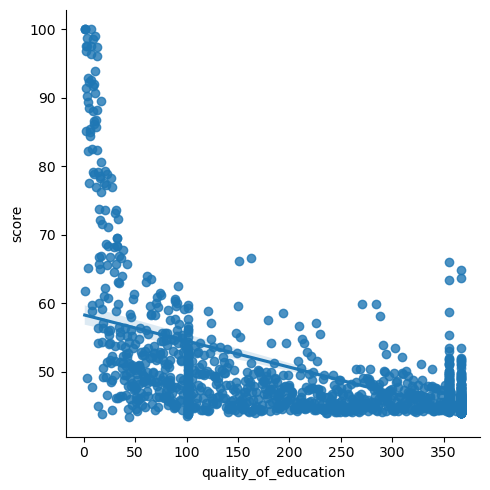

In [68]:

sns.lmplot( x = 'quality_of_education', y = 'score', data = df )

#### 3.3 Pair Plot

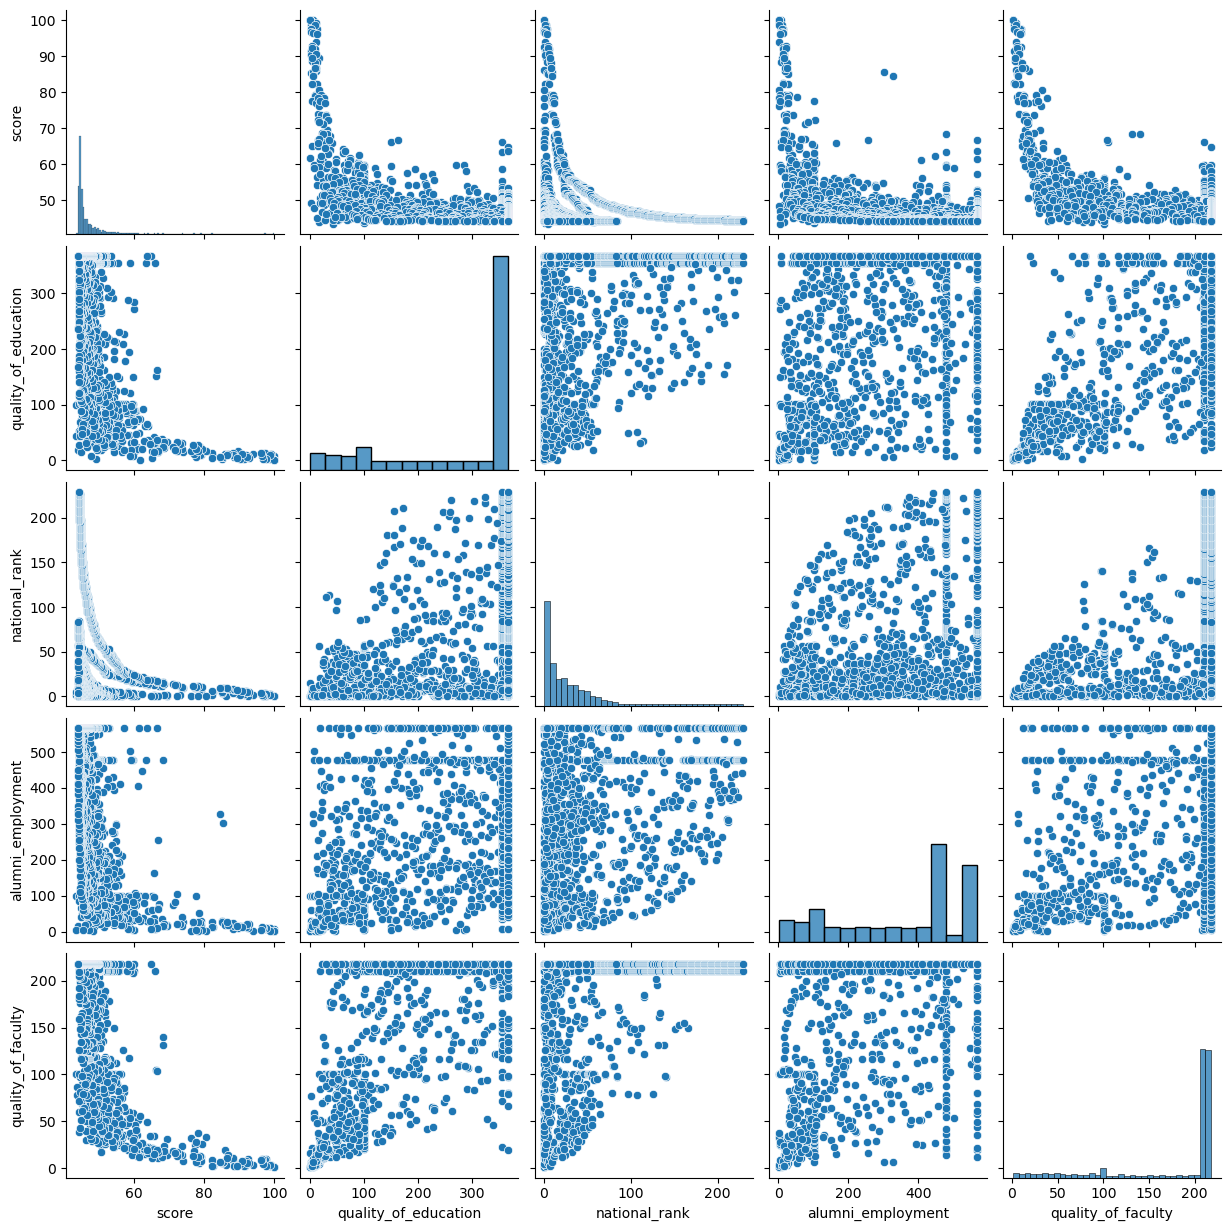

In [70]:
# Create a Pair Plot 
pair_plot = sns.pairplot(df_sub)

#### 3.4 Categorical Plot

<AxesSubplot:xlabel='score', ylabel='Count'>

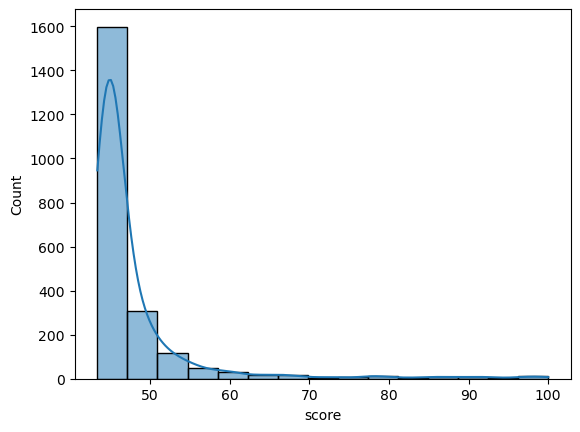

In [20]:
# Create a categorical plot for university score

sns.histplot(df['score'], bins = 15, kde = True)

In [21]:
df.loc[df['score'] < 55, 'university_score'] = 'Low score'

In [22]:
df.loc[(df['score'] >= 55) & (df['score'] < 85), 'university_score'] = 'Middle score'

In [23]:
df.loc[df['score'] >= 85, 'university_score'] =' High score'

In [24]:
df['university_score'] .value_counts(dropna = False)

Low score       2028
Middle score     137
 High score       35
Name: university_score, dtype: int64

In [57]:
# Defining regions by continents 
Africa = ['South Africa','Egypt','Uganda']
America = ['USA','Canada','Brazil','Mexico','Argentina','Chile','Colombia','Uruguay','Puerto Rico']
Asia = ['Japan','Israel','South Korea','Hong Kong','Thailand', 'Malaysia', 'Turkey', 'Saudi Arabia', 
        'Iran', 'United Arab Emirates', 'Singapore', 'Russia', 'China','Taiwan','India','Lebanon']
Europe = ['United Kingdom','Switzerland','France','Sweden', 'Italy', 'Germany', 'Netherlands', 'Finland',
          'Norway', 'Denmark', 'Belgium', 'Spain', 'Ireland', 'Austria', 'Portugal','Czech Republic',
          'Greece', 'Hungary', 'Poland', 'Iceland', 'Slovenia', 'Estonia', 'Croatia', 'Slovak Republic',
          'Serbia', 'Bulgaria', 'Lithuania' , 'Cyprus', 'Romania']
Oceania = ['Australia', 'New Zealand']



In [60]:
df.loc[df['country'].isin(Africa), 'continent'] = 'Africa'

In [61]:
df.loc[df['country'].isin(America), 'continent'] = 'America'

In [62]:
df.loc[df['country'].isin(Asia), 'continent'] = 'Asia'

In [63]:
df.loc[df['country'].isin(Europe), 'continent'] = 'Europe'

In [64]:
df.loc[df['country'].isin(Oceania), 'continent'] = 'Oceania'

In [65]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year', 'university_score', 'continent'],
      dtype='object')

In [66]:
print(df['continent'])

0       America
1       America
2       America
3        Europe
4       America
         ...   
2195     Europe
2196     Africa
2197    America
2198     Europe
2199       Asia
Name: continent, Length: 2200, dtype: object


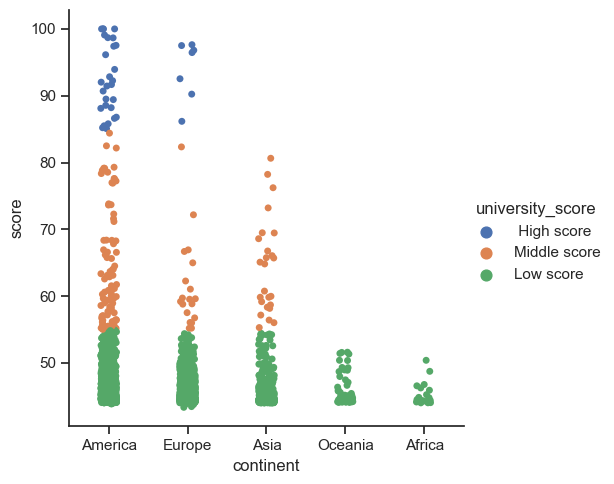

In [67]:
sns.set(style = "ticks")
categorial_plot_score = sns.catplot (x = "continent", y = "score", hue = "university_score", data = df)


Conclusion: A high number of school have a low score, but the schools with higher score are located in America. 

In [142]:
#Analyzing countries by number of institutions
school_by_country= df.groupby('country')['institution'].nunique()
school_by_country

country
Argentina                 4
Australia                27
Austria                  12
Belgium                  10
Brazil                   18
Bulgaria                  1
Canada                   33
Chile                     4
China                    92
Colombia                  2
Croatia                   1
Cyprus                    1
Czech Republic            5
Denmark                   5
Egypt                     4
Estonia                   1
Finland                   9
France                   54
Germany                  56
Greece                    7
Hong Kong                 6
Hungary                   6
Iceland                   1
India                    16
Iran                      9
Ireland                   8
Israel                    7
Italy                    47
Japan                    74
Lebanon                   1
Lithuania                 1
Malaysia                  3
Mexico                    2
Netherlands              13
New Zealand               6
Norway      

In [141]:
# Analyzing countries by average score of the universities considered. 
school_average_by_country= df.groupby('country')['score'].mean()
school_average_by_country

country
Argentina               44.672857
Australia               45.825517
Austria                 45.139583
Belgium                 47.011000
Brazil                  44.781111
Bulgaria                44.335000
Canada                  47.359306
Chile                   44.767500
China                   44.992575
Colombia                44.432500
Croatia                 44.770000
Cyprus                  44.210000
Czech Republic          44.761000
Denmark                 47.774167
Egypt                   44.230000
Estonia                 44.810000
Finland                 45.531500
France                  46.367339
Germany                 46.413130
Greece                  44.854286
Hong Kong               46.295000
Hungary                 44.603333
Iceland                 44.980000
India                   44.713226
Iran                    44.270000
Ireland                 45.235000
Israel                  52.654091
Italy                   45.450208
Japan                   47.229560
Lebano

Hypothesis: 
The universities with the highest scores are located in the Unites States
In America you wiil find the best Universities, specifically in US 

### 4. Export file


In [144]:
# Exporting file 
df.to_pickle(os.path.join(path, 'Data','Prepared Data', 'Analysis_Word_University_Rankings' ))